In [1]:
'''
Student: Calvin Chu
Super Friend Instructor: Ken Smith 

Concepts 
Machine Learning for beginner

'''
# Source: https://elitedatascience.com/keras-tutorial-deep-learning-in-python
import numpy as np
np.random.seed(123)#For reproducibility

In [2]:
# Linear stack of neural networks
from keras.models import Sequential
# Core layers used in almost any neural network
from keras.layers import Dense, Dropout, Activation, Flatten
# CNN layers
from keras.layers import Convolution2D, MaxPooling2D
# Utilities for data transformation
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
# Loading image data from MNIST
from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
# Gives the shape of the data.
# 60000 images, size 28x28
print (X_train.shape)

(60000, 28, 28)


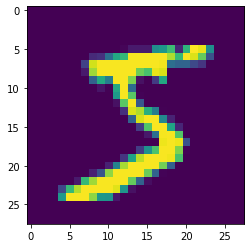

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [6]:
# Adds depth to the dataset because theano backend needs it
#(n, width, height) -> (n, depth, width, height)
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)
print (X_train.shape)

(60000, 1, 28, 28)


In [7]:
# Converts datatype to float32 and normalizes data values to the range [0,1] because theano needs it
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

In [8]:
#Shape of class label data
print (y_train.shape)
#First 10 values in y_train
print (y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [9]:
# Above is problem because y_train and y_test are supposed to be 10 distinct class labels, 
#instead of a single array of class values
#Problem fixed by converting 1D class array to 10D class matrix
Y_train = np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

print (Y_train.shape)

(60000, 10)


In [10]:
# Model Implementation
model = Sequential()# Declare sequential model

'''
CNN input layer

Convolution2D: 
Number of convolution filters to use (32), 
Number of rows in each convolution kernel(3),
Number of columns in each convolution kernel(3)

input_shape: Since our input is one 28x28 image, it's (1,28,28), (depth, width, height)

subsample: Describes to step size
not used in here, (1,1) by default.
'''

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))

# Add more layers
model.add(Convolution2D(32,(3,3), activation='relu',data_format='channels_first'))

#Sepparates the input image into a grid with each cell the size of 2x2
#Gets the max input value for each grid, and creates a new image
#Each cell of the new image contains the max input value from the previous grid
#Makes the image simpler for easier processing, and avoids including small image details in the learning process
model.add(MaxPooling2D(pool_size=(2,2)))

#Randomly removes a certain percentage of neruons from the network with each iteration to prevent overfitting
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))
'''
Note:
Activation Function: Non-linear function applied by a neuron to introduce non-linear properties in the network
Loss Function: Method of evaluating how well your algorithm models your dataset
-Calculates the error rate
'''

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'\nNote:\nActivation Function: Non-linear function applied by a neuron to introduce non-linear properties in the network\nLoss Function: Method of evaluating how well your algorithm models your dataset\n-Calculates the error rate\n'

In [11]:
#Compiles the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.2180 - acc: 0.9337
Epoch 2/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0934 - acc: 0.9720
Epoch 3/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0732 - acc: 0.9782
Epoch 4/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0585 - acc: 0.9823
Epoch 5/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0500 - acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0447 - acc: 0.9855
Epoch 7/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0399 - acc: 0.98720s - loss: 0.04
Epoch 8/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0361 - acc: 0.9884
Epoch 9/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0333 - acc: 0.98941s - loss:
Epoch 10/

In [13]:
#Evaluate model on test data
score=model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.029604335062149992, 0.9919]
